In [33]:
# !pip install sentence-transformers
from sentence_transformers import SentenceTransformer, util

In [34]:
# Initialize the model
NLPmodel = SentenceTransformer('./sentence-transformers_all-MiniLM-L6-v2') # SentenceTransformer('all-MiniLM-L6-v2')

## Use our data

In [86]:
# import other packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [87]:
param_name = 'subtlety'

In [88]:
expt_type = 'subtlety/without_cover_story/'
rootfile_loc = f'../../data/text_responses/{expt_type}'

In [89]:
df =  pd.read_csv(f'{rootfile_loc}/data_triallevel_sorted.csv',index_col=[0])
# df =  pd.read_csv('../data/collected_data/data_triallevel_sorted.csv',index_col=[0])
df.head()

,subID,stimset_rows,subtlety,responses,movie,trial_num
0,15000,0,0,grey dot following black dot,07cdb9d7-6577-428d-9498-8a7243527554,0
6,15001,1,0,A grey dot appeared to chase or follow a black...,53613c0d-b07e-4b22-b6ec-56dda26edc8f,6
0,15002,2,0,the black dot seemed to be running away from t...,19c65966-3d88-4851-afe4-ae34c498748c,0
2,15003,3,0,Black dot was following the grey dot,c188e383-94d7-475e-9da5-6d1f0a1184bb,2
3,15004,6,0,Black moved from right to left chasing the grey,49e5ac90-6e7f-4243-9552-8c4c10545895,3


## NLP algo

In [90]:
words_to_compare = df['responses'].to_list()
words_to_compare = [s.lower() for s in words_to_compare]
words_to_compare

['grey dot following black dot',
 'a grey dot appeared to chase or follow a black dot right and then up.',
 'the black dot seemed to be running away from the gray one',
 'black dot was following the grey dot',
 'black moved from right to left chasing the grey',
 'black dot was being chased by the grey one',
 'it seemed like the grey dot was trying to chase the black dot',
 'lighter dot is being pressured by dark one',
 'grey sot following black dot',
 'the black dot was following the grey dot in a beeline.',
 'black dot being chased by white dot',
 'again the black dot moved toward the grey dot which moved to get away from the black dot',
 'the grey dot approached the black dot and both curved in a downwards sweep to the bottom of the box',
 'the grey dot was chasing the black dot',
 'the grey dot was moving closer to the black dot, as they reached a distance, the dot did not move any closer but mimicked the moves of the other one ',
 'black chasseing dray dot',
 'the white dot is chas

In [91]:
excluded_words_list = ['dots','dot','around','dont know',"don't know",'black','grey','gray', 'color', 'colors','shape', 'shapes', 'one', 'ones','ball',\
    'balls','twice', '.', ';', ':', '-', ' the ', ' and ', ' a ', ' an ', ' is ', ' are ', ' and ', ' or ', 'between']

In [92]:
def skip_excluded_words(txt):
    txt = txt.lower()
    for words in excluded_words_list:
        txt = txt.replace(words,' ')
    return txt

skip_excluded_words('This is black.')

'this   '

In [93]:
# words_to_compare = [skip_excluded_words(i) for i in words_to_compare]
# words_to_compare[:5]

In [94]:
words_to_compare[:5]

['grey dot following black dot',
 'a grey dot appeared to chase or follow a black dot right and then up.',
 'the black dot seemed to be running away from the gray one',
 'black dot was following the grey dot',
 'black moved from right to left chasing the grey']

In [95]:
# ref_words = ['follow','chase','wander','move','independent', 'moveInd']
ref_words = ['chase','moveInd', 'chase_moveInd']

In [96]:
# Encode the reference phrase and the words to compare
similarity_all_1 = []
similarity_all_2= []

for ref_word in ref_words[:-1]:
    if ref_word == 'moveInd':
        print('here')
        reference_embedding = NLPmodel.encode('moving independently')
    else:
        reference_embedding = NLPmodel.encode(ref_word)

    data_embeddings = NLPmodel.encode(words_to_compare)

    # Compare and print similarities
    for embedding in data_embeddings:

        similarity = util.pytorch_cos_sim(reference_embedding, embedding) # similarity between ref word and each response

        if ref_word in ['chase','chasing']:
            similarity_all_1.append(similarity.item())

        if ref_word in ['moveInd', 'move independently','moving independently']:
            similarity_all_2.append(similarity.item())

df['similarity_chase'] = similarity_all_1
df['similarity_moveInd'] = similarity_all_2
df['similarity_chase_moveInd'] = df['similarity_chase'] - df['similarity_moveInd']

here


In [97]:
df.sort_values(by=['subtlety','subID'],inplace=True)
df

,subID,stimset_rows,subtlety,responses,movie,trial_num,similarity_chase,similarity_moveInd,similarity_chase_moveInd
0,15000,0,0,grey dot following black dot,07cdb9d7-6577-428d-9498-8a7243527554,0,0.107751,0.012228,0.095523
6,15001,1,0,A grey dot appeared to chase or follow a black...,53613c0d-b07e-4b22-b6ec-56dda26edc8f,6,0.334429,0.133440,0.200989
0,15002,2,0,the black dot seemed to be running away from t...,19c65966-3d88-4851-afe4-ae34c498748c,0,0.149331,0.079583,0.069748
2,15003,3,0,Black dot was following the grey dot,c188e383-94d7-475e-9da5-6d1f0a1184bb,2,0.173628,0.063710,0.109918
3,15004,6,0,Black moved from right to left chasing the grey,49e5ac90-6e7f-4243-9552-8c4c10545895,3,0.263221,0.333711,-0.070490
...,...,...,...,...,...,...,...,...,...
2,15055,71,180,going around in a circle- opposing ends one to...,12a3cd27-040f-4199-9edb-5cd4bb71b3d0,2,0.098041,0.153227,-0.055186
0,15056,65,180,They were moving randomly,802575f0-631d-4eeb-9e49-3b401b11b953,0,0.187932,0.416294,-0.228362
6,15057,68,180,The dots touched then went away from each other,2176e0c4-bf6c-4f4a-a64b-23825205a150,6,0.049517,0.083536,-0.034019
0,15058,73,180,They were mirroring each other and moving at t...,00ccc21a-d63a-41eb-8d3b-a2315d7b0d3e,0,0.193599,0.385778,-0.192179


In [98]:
rootfile_loc

'../../data/text_responses/subtlety/without_cover_story/'

In [99]:
df.to_csv(f'{rootfile_loc}/NLP_analyses/data_with_similarity_scores.csv')

# Figures

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

s=14 # CHANGE FONTSIZE HERE
plt.rc('font', size=s) #controls default text size
plt.rc('axes', titlesize=s) #fontsize of the title
plt.rc('axes', labelsize=s) #fontsize of the x and y labels
plt.rc('xtick', labelsize=14) #fontsize of the x tick labels
plt.rc('ytick', labelsize=s) #fontsize of the y tick labels
plt.rc('legend', fontsize=s) #fontsize of the legend

color_plots = 'tab:blue' # or tab:red

In [101]:
ref_words

['chase', 'moveInd', 'chase_moveInd']

In [102]:
# inds = [[0,0],[0,1],[1,0],[1,1],[1,2],[0,2]]
# words_pos_dict = dict(zip(ref_words,inds))
# words_pos_dict

In [103]:
out_loc = '../../results/text_analysis/subtlety/no_cover_story/'

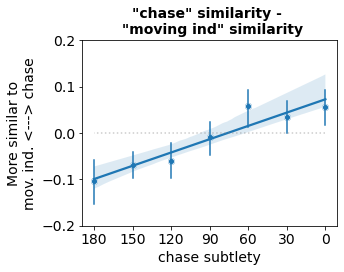

In [105]:
# nrows,ncols = 2,3
# fig,axs = plt.subplots(nrows = 2, ncols = 3, figsize = (12,6), sharey = False)
fig,ax = plt.subplots(nrows=1,ncols=1,figsize = (5,4))

word = 'chase_moveInd'
sns.lineplot(data=df.reset_index(),x = param_name,y = 'similarity_' + word,\
    ax=ax,marker = 'o', ls = 'None', color = color_plots, err_style='bars')
sns.regplot(data=df.groupby([param_name]).mean().reset_index(),x = param_name,y = 'similarity_' + word,\
    ax=ax,scatter_kws = {'marker':None}, color = color_plots)
ax.set_xticks(np.unique(df[param_name]))

ax.set_title(f'"chase" similarity - \n "moving ind" similarity', fontweight = 'bold')
ax.hlines(0,0,180,color = 'grey',ls = ':',alpha=.4)
ax.set_yticks([-.2,-.1,0,0.1,0.2])

ax.set_ylabel('More similar to\nmov. ind. <---> chase')
ax.invert_xaxis()

ax.set_xlabel('chase subtlety')

plt.tight_layout()
plt.savefig(f'{out_loc}word_similarity.png',dpi=300,bbox_inches ='tight')

### Stat + plots

In [54]:
from pymer4.models import Lmer
from pymer4.stats import vif
from scipy.stats import zscore

In [55]:
# df['subtlety'] = 180-df['subtlety']
# df['subtlety'] = df['subtlety']/180
df['subtlety'] = zscore(df['subtlety'])
df

,subID,stimset_rows,subtlety,responses,movie,trial_num,similarity_chase,similarity_moveInd,similarity_chase_moveInd
0,15000,0,-1.5,grey dot following black dot,07cdb9d7-6577-428d-9498-8a7243527554,0,0.320022,0.165968,0.154055
6,15001,1,-1.5,A grey dot appeared to chase or follow a black...,53613c0d-b07e-4b22-b6ec-56dda26edc8f,6,0.608152,0.170275,0.437877
0,15002,2,-1.5,the black dot seemed to be running away from t...,19c65966-3d88-4851-afe4-ae34c498748c,0,0.226499,0.120050,0.106449
2,15003,3,-1.5,Black dot was following the grey dot,c188e383-94d7-475e-9da5-6d1f0a1184bb,2,0.303377,0.182346,0.121031
3,15004,6,-1.5,Black moved from right to left chasing the grey,49e5ac90-6e7f-4243-9552-8c4c10545895,3,0.474286,0.475015,-0.000730
...,...,...,...,...,...,...,...,...,...
2,15055,71,1.5,going around in a circle- opposing ends one to...,12a3cd27-040f-4199-9edb-5cd4bb71b3d0,2,0.026545,0.090060,-0.063515
0,15056,65,1.5,They were moving randomly,802575f0-631d-4eeb-9e49-3b401b11b953,0,0.187932,0.416294,-0.228362
6,15057,68,1.5,The dots touched then went away from each other,2176e0c4-bf6c-4f4a-a64b-23825205a150,6,-0.029821,0.130133,-0.159954
0,15058,73,1.5,They were mirroring each other and moving at t...,00ccc21a-d63a-41eb-8d3b-a2315d7b0d3e,0,0.194443,0.369285,-0.174842


In [56]:
ref_words

['chase', 'moveInd', 'chase_moveInd']

In [57]:
ref_words

['chase', 'moveInd', 'chase_moveInd']

In [25]:
model = Lmer(f'similarity_{ref_words[0]} ~ subtlety +  (1|subID) + (1|movie)', data=df) # ff: anglesm rfx: subject ID
model.fit()

Formula: similarity_chase~subtlety+(1|subID)+(1|movie)

Family: gaussian	 Inference: parametric

Number of observations: 420	 Groups: {'movie': 84.0, 'subID': 60.0}

Log-likelihood: 242.490 	 AIC: -484.979

Random effects:

                 Name    Var    Std
movie     (Intercept)  0.001  0.025
subID     (Intercept)  0.005  0.074
Residual               0.014  0.120

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.200,0.178,0.223,0.012,59.539,17.415,0.0,***
subtlety,-0.059,-0.072,-0.046,0.007,67.294,-9.047,0.0,***


In [26]:
model = Lmer(f'similarity_{ref_words[1]} ~ subtlety +  (1|subID) + (1|movie)', data=df) # ff: anglesm rfx: subject ID
model.fit()

boundary (singular) fit: see ?isSingular 

Formula: similarity_moveInd~subtlety+(1|subID)+(1|movie)

Family: gaussian	 Inference: parametric

Number of observations: 420	 Groups: {'movie': 84.0, 'subID': 60.0}

Log-likelihood: 233.303 	 AIC: -466.606

Random effects:

                 Name    Var    Std
movie     (Intercept)  0.000  0.000
subID     (Intercept)  0.005  0.069
Residual               0.016  0.126

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.253,0.232,0.274,0.011,59.0,23.371,0.0,***
subtlety,0.031,0.019,0.043,0.006,359.0,5.062,0.0,***


In [27]:
model = Lmer(f'similarity_{ref_words[2]} ~ subtlety  +  (1|subID) + (1|movie)', data=df) # ff: anglesm rfx: subject ID
model.fit()

boundary (singular) fit: see ?isSingular 

Formula: similarity_chase_moveInd~subtlety+(1|subID)+(1|movie)

Family: gaussian	 Inference: parametric

Number of observations: 420	 Groups: {'movie': 84.0, 'subID': 60.0}

Log-likelihood: 73.211 	 AIC: -146.422

Random effects:

                 Name    Var    Std
movie     (Intercept)  0.000  0.000
subID     (Intercept)  0.014  0.119
Residual               0.033  0.182

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),-0.053,-0.087,-0.018,0.018,59.0,-2.972,0.004,**
subtlety,-0.090,-0.107,-0.073,0.009,359.0,-10.158,0.000,***


In [28]:
model = Lmer(f'similarity_{ref_words[2]} ~ subtlety  +  (1|subID)', data=df) # ff: anglesm rfx: subject ID
model.fit()

Formula: similarity_chase_moveInd~subtlety+(1|subID)

Family: gaussian	 Inference: parametric

Number of observations: 420	 Groups: {'subID': 60.0}

Log-likelihood: 73.211 	 AIC: -146.422

Random effects:

                 Name    Var    Std
subID     (Intercept)  0.014  0.119
Residual               0.033  0.182

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),-0.053,-0.087,-0.018,0.018,59.0,-2.972,0.004,**
subtlety,-0.090,-0.107,-0.073,0.009,359.0,-10.158,0.000,***


In [29]:
model = Lmer(f'similarity_{ref_words[3]} ~ subtlety +  (1|subID) + (1|movie) ', data=df) # ff: anglesm rfx: subject ID # + (1|movie)
model.fit()

IndexError: list index out of range

In [ ]:
model = Lmer(f'similarity_{ref_words[3]} ~ subtlety +  (1|subID)', data=df) # ff: anglesm rfx: subject ID # + (1|movie)
model.fit()

Formula: similarity_move~subtlety+(1|subID)

Family: gaussian	 Inference: parametric

Number of observations: 420	 Groups: {'subID': 60.0}

Log-likelihood: 385.683 	 AIC: -771.367

Random effects:

                 Name    Var    Std
subID     (Intercept)  0.003  0.052
Residual               0.008  0.087

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.226,0.211,0.242,0.008,59.0,28.539,0.000,***
subtlety,0.014,0.006,0.023,0.004,359.0,3.424,0.001,***


In [ ]:
model = Lmer(f'similarity_{ref_words[4]} ~ subtlety +  (1|subID) + (1|movie) ', data=df) # ff: anglesm rfx: subject ID # + (1|movie)
model.fit()

boundary (singular) fit: see ?isSingular 

Formula: similarity_independent~subtlety+(1|subID)+(1|movie)

Family: gaussian	 Inference: parametric

Number of observations: 420	 Groups: {'movie': 84.0, 'subID': 60.0}

Log-likelihood: 668.827 	 AIC: -1337.654

Random effects:

                 Name    Var    Std
movie     (Intercept)  0.000  0.000
subID     (Intercept)  0.001  0.030
Residual               0.002  0.043

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.054,0.045,0.062,0.004,59.0,12.312,0.0,***
subtlety,0.012,0.008,0.017,0.002,359.0,5.825,0.0,***


In [ ]:
model = Lmer(f'similarity_{ref_words[4]} ~ subtlety +  (1|subID)', data=df) # ff: anglesm rfx: subject ID # + (1|movie)
model.fit()

Formula: similarity_independent~subtlety+(1|subID)

Family: gaussian	 Inference: parametric

Number of observations: 420	 Groups: {'subID': 60.0}

Log-likelihood: 668.827 	 AIC: -1337.654

Random effects:

                 Name    Var    Std
subID     (Intercept)  0.001  0.030
Residual               0.002  0.043

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.054,0.045,0.062,0.004,59.0,12.312,0.0,***
subtlety,0.012,0.008,0.017,0.002,359.0,5.825,0.0,***


In [ ]:
model = Lmer(f'similarity_{ref_words[5]} ~ subtlety +  (1|subID) + (1|movie)', data=df) # ff: anglesm rfx: subject ID # + (1|movie)
model.fit()

boundary (singular) fit: see ?isSingular 

Formula: similarity_moveInd~subtlety+(1|subID)+(1|movie)

Family: gaussian	 Inference: parametric

Number of observations: 420	 Groups: {'movie': 84.0, 'subID': 60.0}

Log-likelihood: 293.942 	 AIC: -587.885

Random effects:

                 Name    Var    Std
movie     (Intercept)  0.000  0.000
subID     (Intercept)  0.004  0.061
Residual               0.012  0.109

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.166,0.147,0.184,0.010,59.0,17.419,0.0,***
subtlety,0.034,0.024,0.045,0.005,359.0,6.483,0.0,***


In [ ]:
model = Lmer(f'similarity_{ref_words[5]} ~ subtlety +  (1|subID)', data=df) # ff: anglesm rfx: subject ID # + (1|movie)
model.fit()

Formula: similarity_moveInd~subtlety+(1|subID)

Family: gaussian	 Inference: parametric

Number of observations: 420	 Groups: {'subID': 60.0}

Log-likelihood: 293.942 	 AIC: -587.885

Random effects:

                 Name    Var    Std
subID     (Intercept)  0.004  0.061
Residual               0.012  0.109

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.166,0.147,0.184,0.010,59.0,17.419,0.0,***
subtlety,0.034,0.024,0.045,0.005,359.0,6.483,0.0,***


## data-driven approach

In [ ]:
# import nltk
# # nltk.download('wordnet')

# from nltk.corpus import wordnet as wn

# # Retrieve all English lemmas in WordNet
# lemmas = wn.all_lemma_names(pos=wn.VERB)#NOUN)

# # Convert lemmas to a list
# english_words = list(lemmas)

# print(english_words[:100]), len(english_words)

# english_words = [i for i in english_words if '-' not in i]
# english_words = [i for i in english_words if '_' not in i]
# english_words_embedding = NLPmodel.encode(english_words)

# print(english_words_embedding.shape)

# df_words = pd.DataFrame({'words':english_words, 'word_len':[len(i) for i in english_words], 'embedding':english_words_embedding.tolist()})
# df_words

In [ ]:
# df_words.shape

In [ ]:
# words_to_compare = df['responses'].to_list()

In [ ]:
# master_verb_list = df_words['words'].values
# master_verb_list = master_verb_list[~np.isin(master_verb_list, ['dot', 'black', 'grey', 'gray','blackball'])]
# master_embeddings = NLPmodel.encode(master_verb_list)#words_to_compare)

# representative_verb = []
# for i,reference_phrase in enumerate(words_to_compare): # participant responsesa
#     reference_embedding = NLPmodel.encode(reference_phrase)
#     all_similarity = []
#     for embedding in master_embeddings: # all english verbs' embeddings
#         similarity = util.pytorch_cos_sim(reference_embedding, embedding)
#         all_similarity.append(similarity.mean().item())
#     all_similarity = np.array(all_similarity)
#     # all_similarity = all_similarity[all_similarity not in ['dot','black','grey','gray']
#     words_to_compare = np.array(words_to_compare)
#     # word = words_to_compare[all_similarity == np.nanmax(all_similarity)]
#     word = master_verb_list[all_similarity == np.nanmax(all_similarity)]
#     representative_verb.append(word[0])
# df['representative_verb'] = representative_verb
# df.head()

In [ ]:
# english_words_embedding = df_words['embedding'].values
# english_words =  df_words['words'].values

In [ ]:
# excluded_words_list = ['dot','dots','grey','gray','black'] #'blacken','blackguard','blackball','blackleg','blacktop','blacklead','collide'] #['dot']
# # excluded_words_list.extend(['grey','gray','black'])
# excluded_words_list

In [ ]:
# # word_embedding per chargeSpeed level - comparison to the whole

# mean_embedding = []
# for cspeed in np.unique(df['chargeSpeed']):
#     print(cspeed*7.5+1.5)
#     df_cspeed = df.loc[df['chargeSpeed']==cspeed,:]
#     words_to_compare = df_cspeed['responses'].to_list()
#     words_to_compare =  [s.lower() for s in words_to_compare]
#     mean_embedding_pf = NLPmodel.encode(words_to_compare)
#     mean_embedding_pf = np.nanmedian(mean_embedding_pf,axis=0) # np.nanmean(all_embeddings_currSpeed,axis=0)
#     # mean_embedding.append(mean_embedding_pf)

#     # for mean_embedding_curr in mean_embedding: # responses
#     mean_embedding_curr = mean_embedding_pf
#     # Compare and print similarities
#     # for word, embedding in zip(words_to_compare, word_embeddings):
#     all_similarity = []
#     for embedding in english_words_embedding: #english words
#         similarity = util.pytorch_cos_sim(mean_embedding_curr, embedding)
#         all_similarity.append(similarity.mean().item())
    
#     all_similarity = np.array(all_similarity)
    
#     # word = english_words[np.where(all_similarity == np.nanmax(all_similarity))[0][0]]
#     # print(f"most representative word: {word}")

#     df_temp = pd.DataFrame({'english_words':english_words, 'all_similarity':all_similarity})
#     df_temp = df_temp[~df_temp['english_words'].isin(excluded_words_list)]
#     df_temp = df_temp.reset_index()
#     df_temp.sort_values(by='all_similarity',inplace=True, ascending=False)
#     print(f"most representative words: {df_temp.iloc[:10,1].values}")
#     # take top 10 words


In [ ]:
# # word_embedding per chargeSpeed level - comparison to the whole

# all_similarity = []
# for i in mean_embedding:
#     # Compare and print similarities
#     # for word, embedding in zip(words_to_compare, word_embeddings):

#     similarity_speed = []
#     for j in mean_embedding:
#         similarity_speed.append(util.pytorch_cos_sim(i, j).mean().item())

#     all_similarity.append(similarity_speed)

# all_similarity = np.array(all_similarity)
    
#     # word = english_words[np.where(all_similarity == np.nanmin(all_similarity))[0][0]]
#     # print(f"most representative word: {word}")
# sns.heatmap(all_similarity, cmap = 'RdBu_r',vmin = -1,vmax =1)


In [ ]:
# # word_embedding per chargeSpeed level - comparison to the whole

# mean_embedding = []
# # for cspeed in np.unique(df['chargeSpeeds']):
# #     df_speed = df.loc[df['chargeSpeeds']==cspeed,:]
# # words_to_compare = df_speed['responses'].to_list()

# words_to_compare = df['responses'].to_list()
# words_to_compare =  [s.lower() for s in words_to_compare]
# all_embeddings = model.encode(words_to_compare)

# all_similarity = []
# for i in all_embeddings:
#     # Compare and print similarities
#     # for word, embedding in zip(words_to_compare, word_embeddings):
#     all_similarity_i = []
#     for j in all_embeddings:
#         similarity = util.pytorch_cos_sim(i, j)
#         all_similarity_i.append(similarity.median().item())
#     all_similarity.append(all_similarity_i)

# all_similarity = np.array(all_similarity)